In [1]:
from pathlib import Path
npzfiles = Path('simulation_results').rglob('*.npz')

In [2]:
import numpy as np

chi2_stats = np.zeros(500)
chi2_pvals = np.zeros(500)

In [3]:
from simulations.global_chi2_cpm import get_chi_squared_statistic

In [4]:
rate = 2
frequency_vector = 0.05 * np.ones(11)
frequency_vector[-1] = 1. - np.sum(frequency_vector[:-1])

In [5]:
frequency_vector

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5 ])

In [6]:
for filenum, filename in enumerate(npzfiles):
    npzfile = np.load(filename)
    try:
        true_cell_results = npzfile['true_cell_results']
    except KeyError as e:
        print('filenum was: {}'.format(filenum))
        raise KeyError(e)
    
    for batch_number in range(5):
        batch = true_cell_results[..., batch_number]
        stat, pval = get_chi_squared_statistic(batch, frequency_vector, rate)
        
        chi2_stats[5*filenum+batch_number] = stat
        chi2_pvals[5*filenum+batch_number] = pval

In [7]:
import matplotlib.pyplot as plt

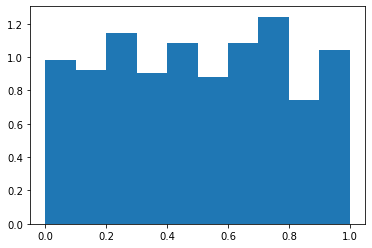

In [8]:
plt.hist(chi2_pvals, density=True)
plt.show()

hm OK this looks much closer to a uniform distribution actually good...

hm maybe it's because the distribution of counts is a lot more unbalanced for $0.1\%$? so maybe "more variance" or "more susceptibility to variance"?

if that explanation is correct, it actually doesn't seem to spell good news for CTPMH or CPDM or CNBDM not being significantly difrerent... oh well...